In [3]:
import time
import numpy as np
from pyhmc import hmc
import matplotlib.pyplot as plt
%matplotlib inline

def logprob(x, ivar):
    logp = -0.5 * np.sum(ivar * x**2)
    grad = -ivar * x
    return logp, grad

In [91]:
N_params = 3
N_samples = 100000

ivar = 1. / np.random.rand(N_params)

start = time.time()
samples = hmc(logprob, x0=np.random.randn(N_params), args=(ivar,), n_samples=N_samples)
print('Time needed to compute HMC: '+ str(time.time()-start) + ' s')

Time needed to compute HMC: 4.856082916259766 s


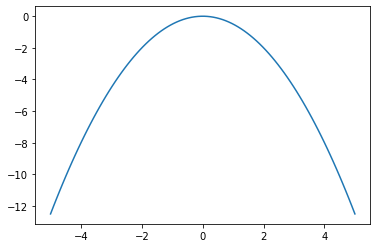

In [9]:
xs = np.linspace(-5.,5.,num=100)
ys = [logprob(x,1.)[0] for x in xs]

plt.plot(xs,ys)

In [94]:
print('ivar = ' + str(ivar))
var = 1/ivar
print('var = ' + str(var))

ivar = [1.33775013 1.21667019 1.97930892]
var = [0.74752375 0.82191543 0.50522685]


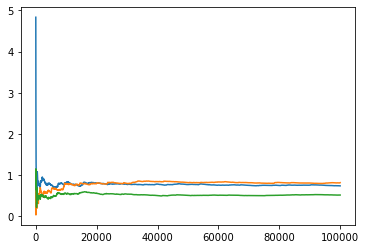

In [93]:
X = np.linspace(1,N_samples,num=N_samples)
for i in range(N_params) :
    T = samples[:,i]

    S = np.cumsum(T,0)
    M = [S[i]/(i+1) for i in range(len(S))]

    Ssq = np.cumsum(T**2,0)
    V = [Ssq[i]/(i+1) - S[i]/(i+1) for i in range(len(S))]
    plt.plot(X,V)

(array([2.88599095e-04, 0.00000000e+00, 1.44299548e-04, 4.32898643e-04,
        7.21497738e-04, 8.65797286e-04, 1.15439638e-03, 1.73159457e-03,
        1.29869593e-03, 2.30879276e-03, 3.03029050e-03, 3.46318914e-03,
        6.78207874e-03, 6.34918010e-03, 7.50357648e-03, 1.02452679e-02,
        1.05338670e-02, 1.71716462e-02, 1.93361394e-02, 2.30879276e-02,
        2.15006326e-02, 2.82827113e-02, 3.80950806e-02, 3.93937765e-02,
        5.00719431e-02, 5.33908326e-02, 6.85422852e-02, 7.53243639e-02,
        9.01872173e-02, 1.02885578e-01, 1.25540606e-01, 1.41702156e-01,
        1.59162401e-01, 1.81240232e-01, 2.12986132e-01, 2.19623912e-01,
        2.41557443e-01, 2.77199431e-01, 2.88310496e-01, 3.13562917e-01,
        3.43432924e-01, 3.62624763e-01, 3.67819547e-01, 3.90474576e-01,
        4.28569657e-01, 4.25683666e-01, 4.47328598e-01, 4.57862465e-01,
        4.72148120e-01, 4.87588172e-01, 4.66664737e-01, 4.75034111e-01,
        4.60315557e-01, 4.53822078e-01, 4.40257920e-01, 4.323214

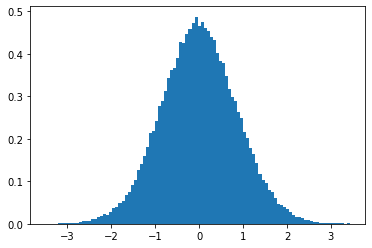

In [96]:
Y = samples[:,0]
plt.hist(Y,density=True,bins=100)
plt.plot(X,)